## Load Libraries

### Visualization / Heatmap

In [33]:
#%matplotlib notebook
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


In [34]:
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

In [35]:
mpl.style.use(['ggplot'])

### Dataframe and Math Functions

In [36]:
from __future__ import print_function
import numpy as np
import pandas as pd
#!pip install --upgrade pip
#!pip install xlrd

## Load Data And Explore

In [37]:
df_fit = pd.read_csv('2020-09-06 Daily Summaries.csv')
df_fit.tail()

,Date,Calories (kcal),Distance (m),Average heart rate (bpm),Max heart rate (bpm),Min heart rate (bpm),Low latitude (deg),Low longitude (deg),High latitude (deg),High longitude (deg),...,Rowing machine duration (ms),Treadmill running duration (ms),Sleep duration (ms),Stair climbing machine duration (ms),Ergometer duration (ms),Other duration (ms),Light sleeping duration (ms),Deep sleeping duration (ms),Awake mid-sleeping duration (ms),Guided breathing duration (ms)
2602,2020-09-02,2220.840397,4259.108668,79.373920,128.922043,56.391060,40.742182,-73.976542,40.743913,-73.975106,...,NaN,NaN,2700000.0,NaN,NaN,NaN,10980000.0,10500000.0,660000.0,NaN
2603,2020-09-03,2027.469660,2013.531665,71.415183,157.698975,50.828796,40.741923,-73.978314,40.743322,-73.975951,...,NaN,NaN,2520000.0,NaN,NaN,NaN,12780000.0,11700000.0,420000.0,NaN
2604,2020-09-04,2618.674427,1739.240100,73.894501,152.344666,49.480049,40.743045,-73.976038,40.743317,-73.975939,...,2746087.0,NaN,2820000.0,NaN,NaN,NaN,14460000.0,5280000.0,NaN,NaN
2605,2020-09-05,2696.826674,10222.175941,72.568419,147.627563,48.392181,40.722423,-74.003448,40.744324,-73.975527,...,NaN,NaN,2760000.0,NaN,NaN,NaN,14160000.0,10080000.0,960000.0,NaN
2606,2020-09-06,796.759420,323.517190,65.997196,127.612991,45.104023,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,16320000.0,7080000.0,300000.0,NaN


In [38]:
df_fit.head()

,Date,Calories (kcal),Distance (m),Average heart rate (bpm),Max heart rate (bpm),Min heart rate (bpm),Low latitude (deg),Low longitude (deg),High latitude (deg),High longitude (deg),...,Rowing machine duration (ms),Treadmill running duration (ms),Sleep duration (ms),Stair climbing machine duration (ms),Ergometer duration (ms),Other duration (ms),Light sleeping duration (ms),Deep sleeping duration (ms),Awake mid-sleeping duration (ms),Guided breathing duration (ms)
0,2012-09-18,1185.313721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2012-09-19,1786.499878,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2012-09-20,1786.499878,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2012-09-21,1339.213242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2012-09-22,1778.499743,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
df_fit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2607 entries, 0 to 2606
Data columns (total 55 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Date                                     2607 non-null   object 
 1   Calories (kcal)                          2425 non-null   float64
 2   Distance (m)                             1935 non-null   float64
 3   Average heart rate (bpm)                 687 non-null    float64
 4   Max heart rate (bpm)                     687 non-null    float64
 5   Min heart rate (bpm)                     687 non-null    float64
 6   Low latitude (deg)                       897 non-null    float64
 7   Low longitude (deg)                      897 non-null    float64
 8   High latitude (deg)                      897 non-null    float64
 9   High longitude (deg)                     897 non-null    float64
 10  Average speed (m/s)                      1728 no

In [40]:
df_fit.describe()

,Calories (kcal),Distance (m),Average heart rate (bpm),Max heart rate (bpm),Min heart rate (bpm),Low latitude (deg),Low longitude (deg),High latitude (deg),High longitude (deg),Average speed (m/s),...,Rowing machine duration (ms),Treadmill running duration (ms),Sleep duration (ms),Stair climbing machine duration (ms),Ergometer duration (ms),Other duration (ms),Light sleeping duration (ms),Deep sleeping duration (ms),Awake mid-sleeping duration (ms),Guided breathing duration (ms)
count,2425.000000,1935.000000,687.000000,687.000000,687.000000,897.000000,897.000000,897.000000,897.000000,1728.000000,...,4.600000e+01,3.000000e+00,8.000000e+00,1.0,1.100000e+01,1.570000e+02,1.200000e+01,1.200000e+01,8.000000e+00,3.000000
mean,2247.546516,4624.079952,112.114391,150.300927,74.065883,39.493916,-71.552826,39.966640,-70.713011,1.435685,...,2.233759e+06,1.988191e+06,3.000000e+06,1654967.0,2.010573e+06,1.784455e+06,1.247000e+07,8.430000e+06,6.225000e+05,100127.666667
std,590.154072,7103.080844,19.232986,18.635110,15.108252,7.613919,13.797384,6.358613,15.706657,3.058524,...,1.442501e+06,4.419411e+05,2.347132e+06,NaN,6.953297e+05,9.729297e+05,3.940434e+06,3.836376e+06,2.903077e+05,23.797759
min,0.000000,0.000000,63.635036,72.000000,20.000000,0.000000,-87.635437,0.000000,-87.635437,0.000000,...,6.300000e+01,1.589930e+06,1.200000e+05,1654967.0,1.209576e+06,2.270000e+05,3.060000e+06,1.620000e+06,3.000000e+05,100102.000000
25%,2021.499939,2441.687460,102.563918,137.000000,61.066362,40.742314,-73.982483,40.746063,-73.975923,0.662888,...,1.442712e+06,1.750465e+06,2.250000e+06,1654967.0,1.439207e+06,9.000000e+05,1.041000e+07,6.630000e+06,3.900000e+05,100117.000000
50%,2298.935981,4154.867769,115.235340,153.520035,75.000000,40.743039,-73.981761,40.749355,-73.975067,0.916305,...,2.198292e+06,1.911000e+06,2.730000e+06,1654967.0,1.697672e+06,1.637000e+06,1.347000e+07,1.014000e+07,6.000000e+05,100132.000000
75%,2560.374160,5781.209470,126.092420,164.177597,85.000000,40.743459,-73.977654,40.752188,-73.974333,1.330719,...,2.717124e+06,2.187321e+06,2.970000e+06,1654967.0,2.550316e+06,2.695000e+06,1.488000e+07,1.152000e+07,7.800000e+05,100140.500000
max,5787.936138,292370.773208,148.602214,226.000000,114.000000,55.679828,12.584370,55.688120,12.650080,89.422981,...,9.370067e+06,2.463642e+06,8.220000e+06,1654967.0,3.310903e+06,4.638000e+06,1.734000e+07,1.248000e+07,1.080000e+06,100149.000000


In [41]:
df_fit.describe(include='object')

,Date,Blood glucose specimen source
count,2607,216
unique,2607,1
top,2020-05-31,Interstitial fluid
freq,1,216


In [42]:
df_fit.columns

Index(['Date', 'Calories (kcal)', 'Distance (m)', 'Average heart rate (bpm)',
       'Max heart rate (bpm)', 'Min heart rate (bpm)', 'Low latitude (deg)',
       'Low longitude (deg)', 'High latitude (deg)', 'High longitude (deg)',
       'Average speed (m/s)', 'Max speed (m/s)', 'Min speed (m/s)',
       'Step count', 'Average weight (kg)', 'Max weight (kg)',
       'Min weight (kg)', 'Average systolic blood pressure (mmHg)',
       'Max systolic blood pressure (mmHg)',
       'Min systolic blood pressure (mmHg)',
       'Average diastolic blood pressure (mmHg)',
       'Max diastolic blood pressure (mmHg)',
       'Min diastolic blood pressure (mmHg)', 'Body position',
       'Blood pressure measurement location', 'Average blood glucose (mmol/L)',
       'Max blood glucose (mmol/L)', 'Min blood glucose (mmol/L)',
       'Temporal relation to meal', 'Meal type', 'Temporal relation to sleep',
       'Blood glucose specimen source', 'Move Minutes count',
       'Calories Consumed', 'Hea

In [43]:
df_fit.index

RangeIndex(start=0, stop=2607, step=1)

In [44]:
df_fit.shape

(2607, 55)

In [45]:
df_fit.isnull().sum()

Date                                          0
Calories (kcal)                             182
Distance (m)                                672
Average heart rate (bpm)                   1920
Max heart rate (bpm)                       1920
Min heart rate (bpm)                       1920
Low latitude (deg)                         1710
Low longitude (deg)                        1710
High latitude (deg)                        1710
High longitude (deg)                       1710
Average speed (m/s)                         879
Max speed (m/s)                             879
Min speed (m/s)                             879
Step count                                  617
Average weight (kg)                        1165
Max weight (kg)                            1165
Min weight (kg)                            1165
Average systolic blood pressure (mmHg)     2561
Max systolic blood pressure (mmHg)         2561
Min systolic blood pressure (mmHg)         2561
Average diastolic blood pressure (mmHg) 

## Set Index And Format as Date

In [46]:
df_fit.set_index('Date', inplace=True)

In [47]:
df_fit.index.name = 'Date'

In [48]:
df_fit.head()

,Calories (kcal),Distance (m),Average heart rate (bpm),Max heart rate (bpm),Min heart rate (bpm),Low latitude (deg),Low longitude (deg),High latitude (deg),High longitude (deg),Average speed (m/s),...,Rowing machine duration (ms),Treadmill running duration (ms),Sleep duration (ms),Stair climbing machine duration (ms),Ergometer duration (ms),Other duration (ms),Light sleeping duration (ms),Deep sleeping duration (ms),Awake mid-sleeping duration (ms),Guided breathing duration (ms)
Date,,,,,,,,,,,,,,,,,,,,,
2012-09-18,1185.313721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-09-19,1786.499878,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-09-20,1786.499878,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-09-21,1339.213242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-09-22,1778.499743,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
df_fit.index = pd.to_datetime(df_fit.index, format='%Y-%m-%d')

## Cleanse Data / Drop NA

In [50]:
df_fitExplore = df_fit[df_fit.index > '2020-05-01']

In [51]:
df_fitExplore = df_fitExplore.dropna(axis=1)
df_fitExplore.describe()

,Calories (kcal),Step count,Average blood glucose (mmol/L),Max blood glucose (mmol/L),Min blood glucose (mmol/L),Move Minutes count,Inactive duration (ms)
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,1.280000e+02
mean,2265.680261,3693.859375,7.608551,12.482812,3.837500,46.304688,8.071977e+07
std,280.738127,2531.605618,0.880592,2.067640,0.908143,30.992140,9.966266e+06
min,796.759420,617.000000,5.856806,7.900000,2.200000,4.000000,1.024176e+07
25%,2028.571143,1811.500000,7.007057,11.100000,3.200000,20.000000,8.192032e+07
50%,2243.273818,3109.500000,7.528711,12.150000,3.850000,43.000000,8.348304e+07
75%,2453.337008,4866.500000,8.086784,13.425000,4.400000,65.250000,8.513870e+07
max,2999.671111,16015.000000,10.140091,21.600000,6.500000,154.000000,8.640000e+07


In [52]:
df_fitExplore.tail()

,Calories (kcal),Step count,Average blood glucose (mmol/L),Max blood glucose (mmol/L),Min blood glucose (mmol/L),Blood glucose specimen source,Move Minutes count,Inactive duration (ms)
Date,,,,,,,,
2020-09-02,2220.840397,7376.0,9.783100,21.6,2.3,Interstitial fluid,58.0,58545788.0
2020-09-03,2027.469660,4573.0,8.506537,17.9,5.1,Interstitial fluid,27.0,58917872.0
2020-09-04,2618.674427,6456.0,9.789372,18.1,6.4,Interstitial fluid,73.0,60998934.0
2020-09-05,2696.826674,13755.0,8.436176,15.1,3.3,Interstitial fluid,119.0,50876783.0
2020-09-06,796.759420,662.0,6.510998,7.9,5.7,Interstitial fluid,7.0,10241765.0


## Create Correlation Heat Map and List

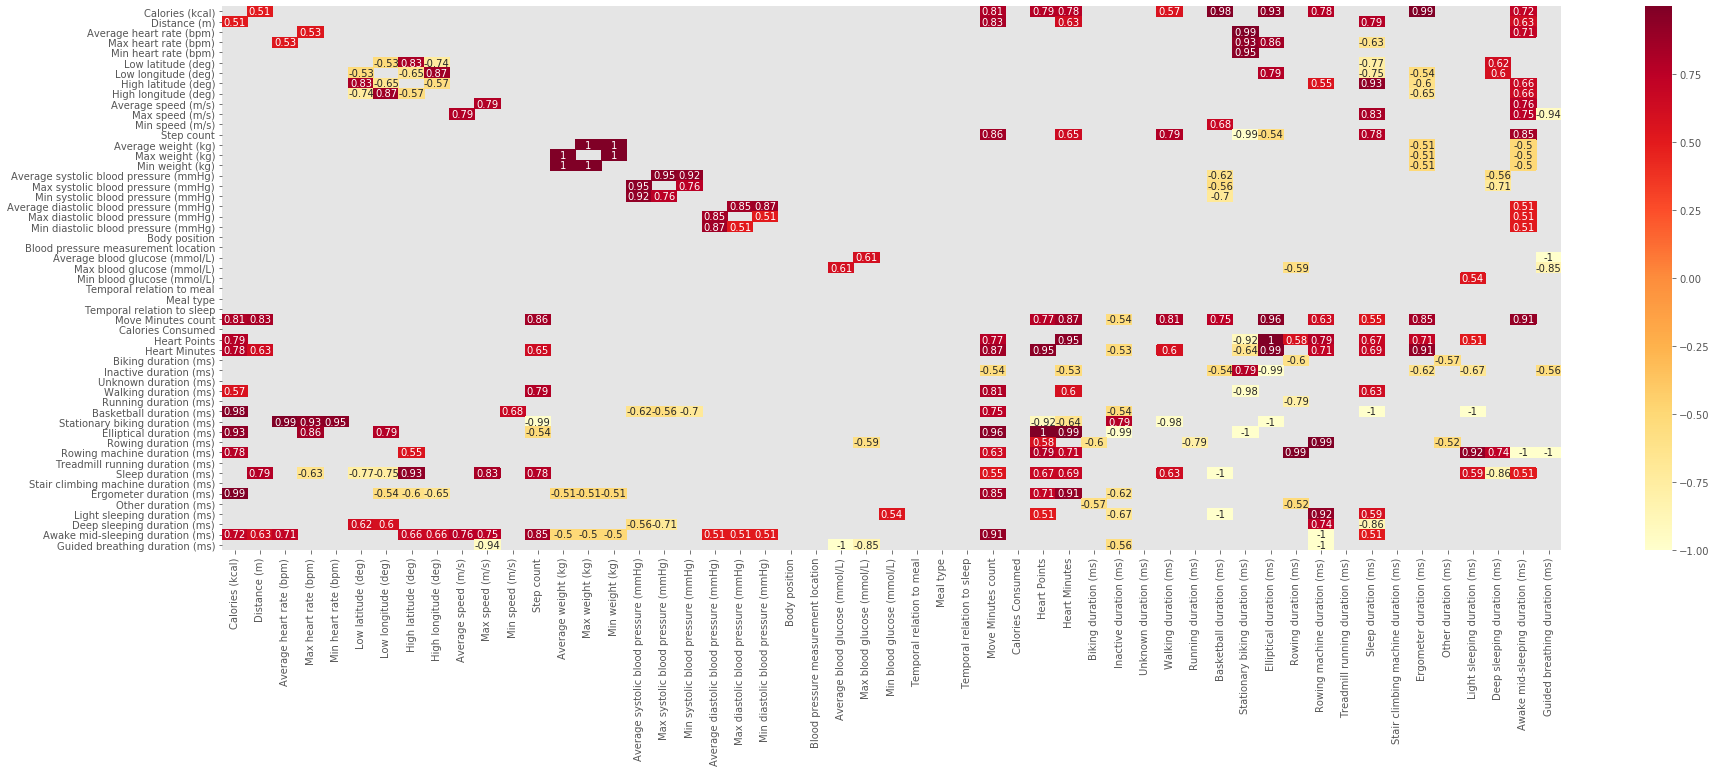

In [60]:
#set data set for analysis
df = df_fit

filterValue = 0.5

corr_fit = df.corr()

filteredDf = corr_fit[((corr_fit >= filterValue) | (corr_fit <= -filterValue)) & (corr_fit !=1.000)]
plt.figure(figsize=(30,10))
sns.heatmap(filteredDf, annot=True, cmap="YlOrRd")
plt.show()

In [61]:
def corrFilter(x: pd.DataFrame, bound: float):
    xCorr = x.corr()
    xFiltered = xCorr[((xCorr >= bound) | (xCorr <= -bound)) & (xCorr !=1.000)]
    xFlattened = xFiltered.unstack().sort_values().drop_duplicates()
    return xFlattened

corr_fit_filtered = corrFilter(df, filterValue)
half = corr_fit_filtered.count() / 2
corr_fit_filtered

Guided breathing duration (ms)  Rowing machine duration (ms)      -1.000000
Average blood glucose (mmol/L)  Guided breathing duration (ms)    -0.999639
Elliptical duration (ms)        Inactive duration (ms)            -0.991467
Step count                      Stationary biking duration (ms)   -0.987838
Walking duration (ms)           Stationary biking duration (ms)   -0.976045
                                                                     ...   
Heart Points                    Elliptical duration (ms)           0.995519
Min weight (kg)                 Max weight (kg)                    0.996986
                                Average weight (kg)                0.999237
Average weight (kg)             Max weight (kg)                    0.999246
Calories (kcal)                 Calories (kcal)                         NaN
Length: 119, dtype: float64

In [62]:
corr_fit_filtered.head(int(half)+1)

Guided breathing duration (ms)          Rowing machine duration (ms)             -1.000000
Average blood glucose (mmol/L)          Guided breathing duration (ms)           -0.999639
Elliptical duration (ms)                Inactive duration (ms)                   -0.991467
Step count                              Stationary biking duration (ms)          -0.987838
Walking duration (ms)                   Stationary biking duration (ms)          -0.976045
Max speed (m/s)                         Guided breathing duration (ms)           -0.943224
Heart Points                            Stationary biking duration (ms)          -0.918948
Sleep duration (ms)                     Deep sleeping duration (ms)              -0.858151
Guided breathing duration (ms)          Max blood glucose (mmol/L)               -0.849706
Rowing duration (ms)                    Running duration (ms)                    -0.792952
Sleep duration (ms)                     Low latitude (deg)                       -0.774562

In [63]:
corr_fit_filtered.tail(int(half)+1)

Heart Minutes                            Step count                             0.646843
High longitude (deg)                     Awake mid-sleeping duration (ms)       0.662164
High latitude (deg)                      Awake mid-sleeping duration (ms)       0.664913
Sleep duration (ms)                      Heart Points                           0.674049
Basketball duration (ms)                 Min speed (m/s)                        0.675809
Sleep duration (ms)                      Heart Minutes                          0.690825
Ergometer duration (ms)                  Heart Points                           0.709922
Average heart rate (bpm)                 Awake mid-sleeping duration (ms)       0.712591
Heart Minutes                            Rowing machine duration (ms)           0.713287
Calories (kcal)                          Awake mid-sleeping duration (ms)       0.724002
Deep sleeping duration (ms)              Rowing machine duration (ms)           0.741319
Awake mid-sleeping du

## Simple Graphs

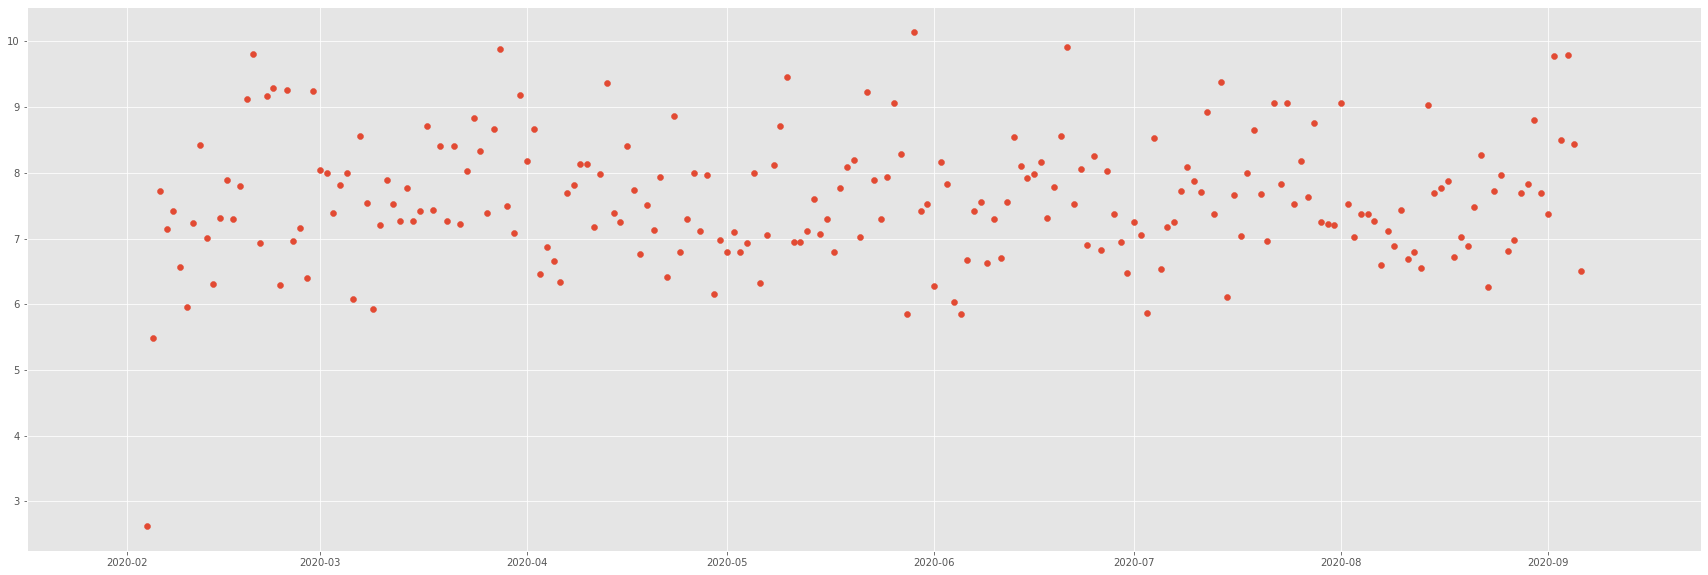

In [67]:

plt.figure(figsize=(30,10))
plt.scatter(df.index, 'Average blood glucose (mmol/L)', data=df)
plt.show()




(0, 10.28930509890638)

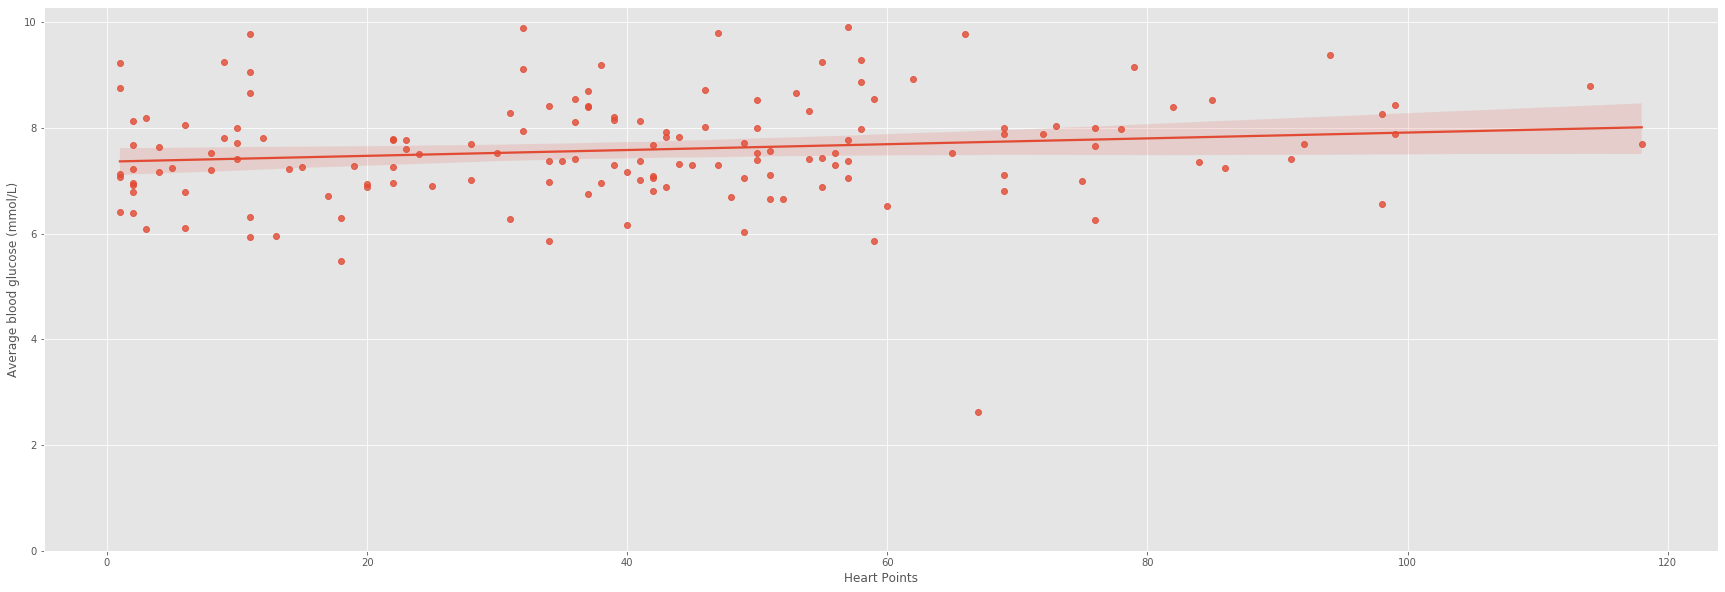

In [71]:
plt.figure(figsize=(30,10))
sns.regplot(x='Heart Points', y='Average blood glucose (mmol/L)', data=df)
plt.ylim(0,)


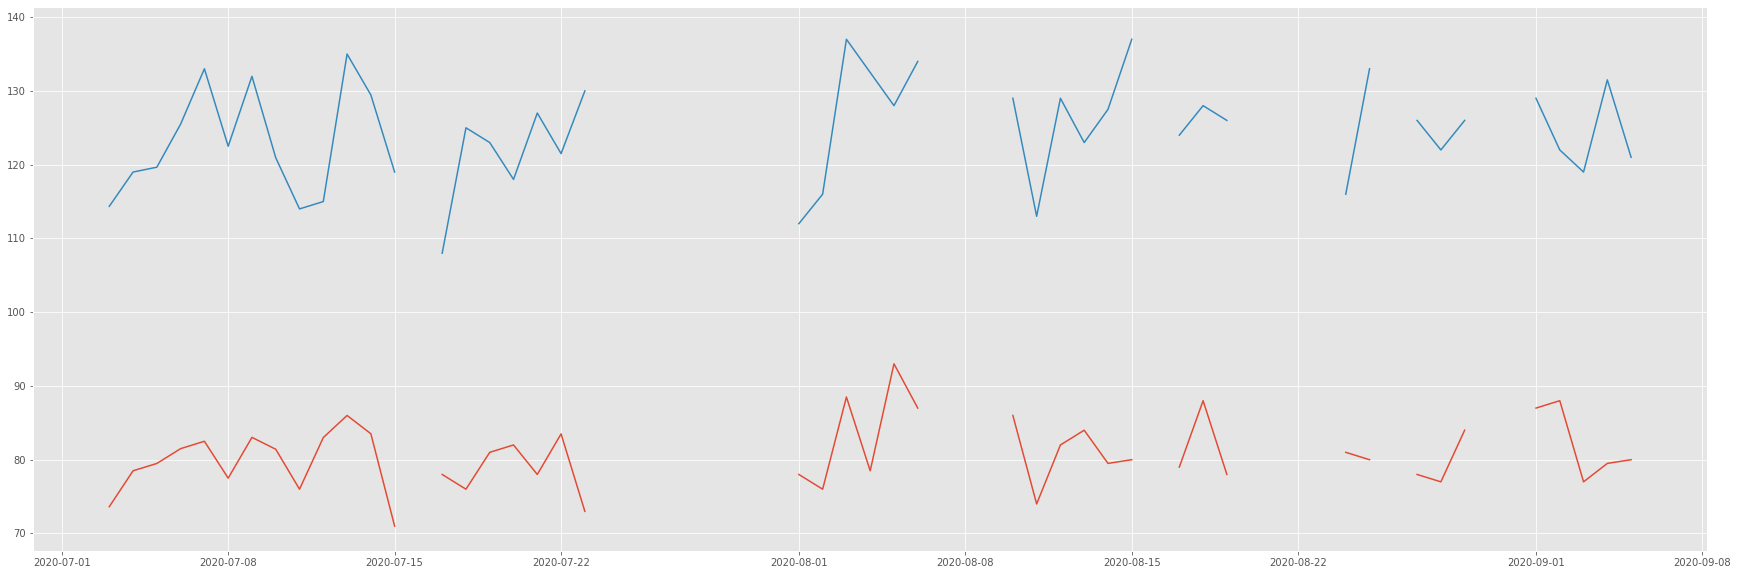

In [66]:


plt.figure(figsize=(30,10))
plt.plot(df.index, df['Average diastolic blood pressure (mmHg)'])
plt.plot(df.index, df['Average systolic blood pressure (mmHg)'])
plt.show()



(0, 139.5066777041943)

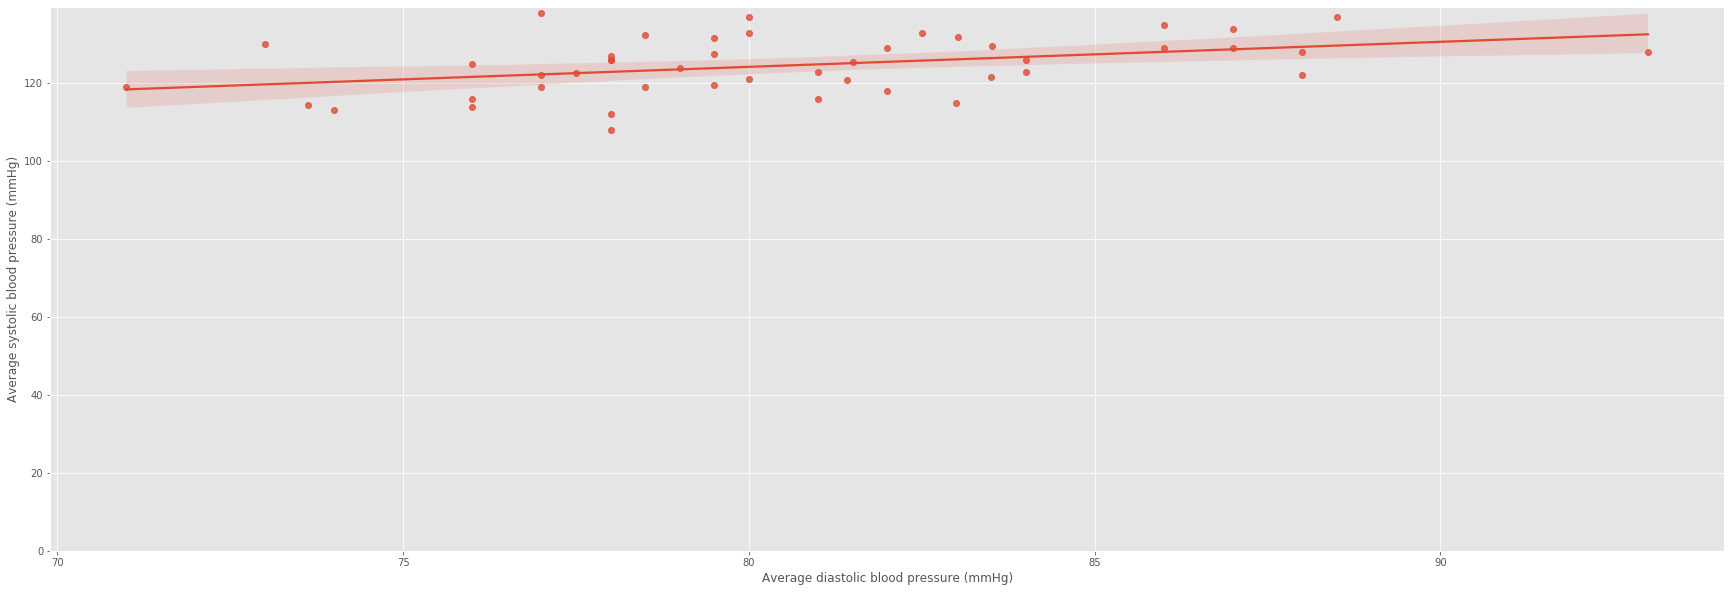

In [72]:
plt.figure(figsize=(30,10))
sns.regplot(x='Average diastolic blood pressure (mmHg)', y='Average systolic blood pressure (mmHg)', data=df)
plt.ylim(0,)

(0, 107.56667770419428)

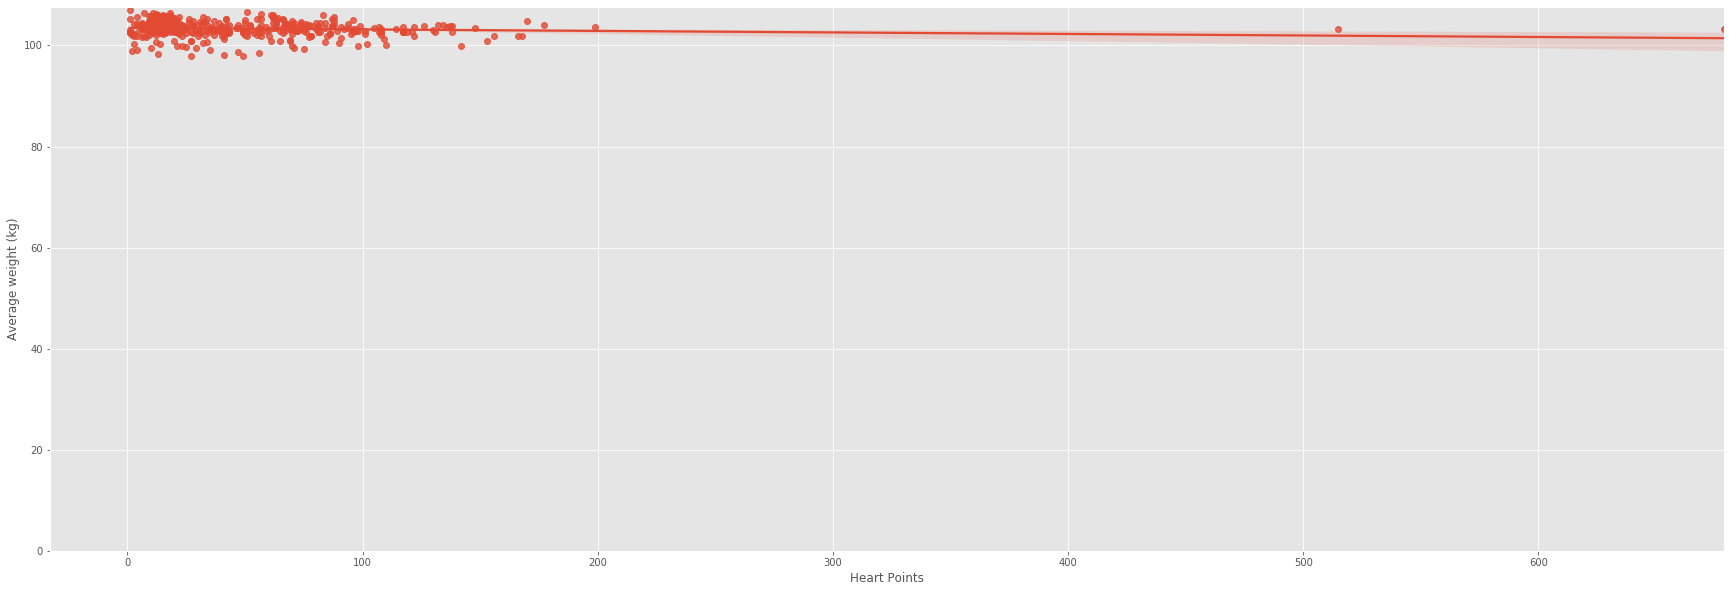

In [77]:
plt.figure(figsize=(30,10))
sns.regplot(x='Heart Points', y='Average weight (kg)', data=df)
plt.ylim(0,)